## Installation instructions

[![colab badge](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mcallaghan/text-as-data/blob/master/Session-11-Spacy-and-Transformers/BERT.ipynb)

To install the required libraries, you will need to do the following in a terminal shell (or prepend a ! to each line and run in colab)

```
pip install transformers
pip install datasets
pip install torch
```


In [1]:
!pip install transformers[torch] -U
!pip install accelerate -U

In [2]:
!pip install datasets

In [3]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import Trainer
from torch import tensor
from torch.nn import Sigmoid, Softmax
import accelerate

In [2]:
from transformers import pipeline

pipe = pipeline("sentiment-analysis")

pipe(["This movie was really bad", "I loved watching this movie"])

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'NEGATIVE', 'score': 0.9998040795326233},
 {'label': 'POSITIVE', 'score': 0.999700665473938}]

In [3]:
pipe = pipeline("text-classification", model="nbroad/ESG-BERT")
texts = [
    "The Hertie School is committed to embedding and mainstreaming diversity, equity and inclusion into all areas of its activities."
]
pipe("The Hertie School is committed to embedding and mainstreaming diversity, equity and inclusion into all areas of its activities.")


config.json:   0%|          | 0.00/2.67k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/376 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

[{'label': 'Employee_Engagement_Inclusion_And_Diversity',
  'score': 0.9726636409759521}]

In [4]:
from textwrap import wrap
run_galactica = False
if run_galactica:
    pipe = pipeline("text-generation", model="facebook/galactica-1.3b")
else:
    pipe = pipeline("text-generation")

res = pipe("Large language models can be useful. However,")
wrap(res[0]["generated_text"])

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


["Large language models can be useful. However, there aren't enough",
 'people working on these models to provide comprehensive analysis of',
 'the problems within their fields and to evaluate their results. You',
 'need to think about those problems as part of your field research and',
 'to provide']

In [16]:
from transformers import AutoTokenizer, OPTForCausalLM
run_galactica = False
if run_galactica:
    #pipe = pipeline("text-generation", model="facebook/galactica-1.3b")
    #res = pipe("What are the benefits of taking the Text as Data course at Hertie", max_length=200)

    tokenizer = AutoTokenizer.from_pretrained("facebook/galactica-1.3b")
    model = OPTForCausalLM.from_pretrained("facebook/galactica-1.3b", device_map="auto")

    input_text = "Wiki page about the Text as Data Course at the Hertie School of Governance. \n#Introduction"
    input_ids = tokenizer(input_text, return_tensors="pt").input_ids.to("cuda")

    outputs = model.generate(input_ids, max_length=200)
    print(tokenizer.decode(outputs[0]))

In [6]:
unmasker = pipeline("fill-mask")

unmasker(f"The GOP is going to {unmasker.tokenizer.mask_token} this election")

No model was supplied, defaulted to distilroberta-base and revision ec58a5b (https://huggingface.co/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

[{'score': 0.46396753191947937,
  'token': 339,
  'token_str': ' win',
  'sequence': 'The GOP is going to win this election'},
 {'score': 0.4603656828403473,
  'token': 2217,
  'token_str': ' lose',
  'sequence': 'The GOP is going to lose this election'},
 {'score': 0.011407283134758472,
  'token': 8052,
  'token_str': ' steal',
  'sequence': 'The GOP is going to steal this election'},
 {'score': 0.008465038612484932,
  'token': 11781,
  'token_str': ' dominate',
  'sequence': 'The GOP is going to dominate this election'},
 {'score': 0.006690779235213995,
  'token': 9808,
  'token_str': ' sweep',
  'sequence': 'The GOP is going to sweep this election'}]

In [4]:
# Let's take some texts and labels
texts, y = zip(
    *[
        ("Climate change is impacting human systems", 1),
        ("Climate change is caused by fossil fuels", 0),
        ("Agricultural yields are affected by climate change", 1),
        ("System change not climate change", 0),
        ("higher temperatures are impacting human health", 1),
        ("Forest fires are becoming more frequent due to climate change", 1),
        ("Machine learning can read texts", 0),
        ("AI can help solve climate change!", 0),
        ("We need to save gas this winter", 0),
        ("More frequent droughts are impacting crop yields", 1),
        ("Many communities are affected by rising sea levels", 1),
        ("Global emissions continue to rise", 0),
        ("Ecosystems are increasingly impacted by rising temperatures", 1),
        ("Emissions from fossil fuels need to decline", 0),
        ("Anthropogenic climate change is impacting vulnerable communities", 1),
    ]
)

In [5]:

# To use these with transformers, we are going to need to get them into the right format.
from datasets import Dataset
from transformers import AutoTokenizer

# First we'll put them into a HuggingFace Dataset object
dataset = Dataset.from_dict({"text": texts, "label": y})

# And now we need to tokenize the texts, using the pretrained tokenizer from climatebert
model_name = "climatebert/distilroberta-base-climate-f"
model_name = "bert-base-uncased"

tokenizer = AutoTokenizer.from_pretrained(model_name)



def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=False)


tokenized_dataset = dataset.map(tokenize_function, batched=True)
tokenized_dataset

Map:   0%|          | 0/15 [00:00<?, ? examples/s]

Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 15
})

In [6]:
# We can wrap this into one function that turns any set of texts (and optional labels)
# into a tokenized huggingface dataset
def datasetify(x, tokenizer, y=None):
    data_dict = {"text": x}
    if y is not None:
        data_dict["label"] = y
    dataset = Dataset.from_dict(data_dict)

    def tokenize_function(examples):
        return tokenizer(examples["text"], padding="max_length", truncation=False)

    return dataset.map(tokenize_function, batched=True)

In [7]:
# Now we want to load our model, and instantiate a Trainer class
from transformers import AutoModelForSequenceClassification


# We set num_labels to 2 for binary classification, as we have two classes - positive and negative
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
# The trainer class needs to be supplied with a model, and a dataset (and will also accept TrainingArguments and validation data)
trainer = Trainer(model=model, train_dataset=datasetify(texts, tokenizer, y))
# Once this has been instantiated we can apply the train() method
trainer.train()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/15 [00:00<?, ? examples/s]

Step,Training Loss


TrainOutput(global_step=6, training_loss=0.6082578500111898, metrics={'train_runtime': 334.3795, 'train_samples_per_second': 0.135, 'train_steps_per_second': 0.018, 'total_flos': 11839997491200.0, 'train_loss': 0.6082578500111898, 'epoch': 3.0})

In [8]:
# To generate predictions, we just need to supply a dataset to the predict method
new_texts = [
    "climate change is impacting terrestrial ecosystems",
    "Machine Learning will solve climate change",
    "Fossil fuels are responsible for rising temperature",
]


pred = trainer.predict(datasetify(new_texts, tokenizer, [1, 0, 0]))
pred

Map:   0%|          | 0/3 [00:00<?, ? examples/s]

PredictionOutput(predictions=array([[-0.8438109 , -0.00437848],
       [ 0.216086  , -0.36399582],
       [ 0.02231268, -0.37511766]], dtype=float32), label_ids=array([1, 0, 0]), metrics={'test_loss': 0.43922653794288635, 'test_runtime': 8.4582, 'test_samples_per_second': 0.355, 'test_steps_per_second': 0.118})

In [9]:
# However, the model output gives us logits. If these are negative, then the prediction
# is negative, if they are positive, the prediction is positive.
# We can turn these into probabilities with an activation function
from torch import tensor
from torch.nn import Sigmoid, Softmax

activation = (
    Softmax()
)  # Since we have two *exclusive classes*, we use the Softmax function
activation(tensor(pred.predictions))

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


tensor([[0.3017, 0.6983],
        [0.6411, 0.3589],
        [0.5981, 0.4019]])

In [10]:
activation = (
    Sigmoid()
)  # With a Sigmoid function, the probabilities don't need to add up to 1 (useful for multilabel classification)
activation(tensor(pred.predictions))

tensor([[0.3007, 0.4989],
        [0.5538, 0.4100],
        [0.5056, 0.4073]])

In [11]:
# If we want to always get probabilities, we can subclass Trainer and add a new predict_proba method

from transformers.trainer_utils import PredictionOutput

class ProbTrainer(Trainer):
    def predict_proba(self, test_dataset: Dataset) -> PredictionOutput:
        logits = self.predict(test_dataset).predictions
        if logits.shape[1] > 2:
            activation = Sigmoid()
        else:
            activation = Softmax()
        return activation(tensor(logits)).numpy()


trainer = ProbTrainer(model=model, train_dataset=datasetify(texts, tokenizer, y))
trainer.train()

pred = trainer.predict_proba(datasetify(new_texts, tokenizer))
pred

Map:   0%|          | 0/15 [00:00<?, ? examples/s]

Step,Training Loss


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

array([[0.15340653, 0.8465935 ],
       [0.8412609 , 0.15873912],
       [0.8670989 , 0.13290106]], dtype=float32)

In [12]:
params = {
  "batch_size": [16, 32],
  "learning_rate": [5e-5, 3e-5, 2e-5],
  "number of epochs": [2,3,4]
}
import itertools
def product_dict(**kwargs):
    keys = kwargs.keys()
    vals = kwargs.values()
    for instance in itertools.product(*vals):
        yield dict(zip(keys, instance))
param_space = list(product_dict(**params))
len(param_space)



18

In [13]:
from transformers import TrainingArguments
for p in param_space:
    break
    training_args = TrainingArguments(
        num_train_epochs=p["number of epochs"],
        learning_rate=p["learning_rate"],
        per_device_train_batch_size=p["batch_size"],
        output_dir="out"
    )
    trainer = ProbTrainer(model=model, train_dataset=datasetify(texts, tokenizer, y), args=training_args)
    trainer.train()

## A model to classify manifesto text into EU topics and non EU topics

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from transformers import BertForSequenceClassification, BertTokenizer
from torch.utils.data import Dataset
from sklearn.metrics import roc_auc_score, accuracy_score, precision_recall_fscore_support

In [2]:
# importing dataset and creating labels
df = pd.read_csv("uk_manifestos.csv")
df.head()

,text,cmp_code,eu_code,party
0,This election is about the crisis of living st...,503.0,NaN,Labour
1,and the climate and environmental emergency.,501.0,NaN,Labour
2,"Whether we are ready or not, we stand on the b...",501.0,NaN,Labour
3,We must confront this change while dealing wit...,503.0,NaN,Labour
4,Labour led the UK Parliament in declaring a cl...,501.0,NaN,Labour


In [3]:
df["eu"] = np.where(df["cmp_code"].isin([108, 110]),1,0)
df.head()

,text,cmp_code,eu_code,party,eu
0,This election is about the crisis of living st...,503.0,NaN,Labour,0
1,and the climate and environmental emergency.,501.0,NaN,Labour,0
2,"Whether we are ready or not, we stand on the b...",501.0,NaN,Labour,0
3,We must confront this change while dealing wit...,503.0,NaN,Labour,0
4,Labour led the UK Parliament in declaring a cl...,501.0,NaN,Labour,0


<Axes: xlabel='eu,party'>

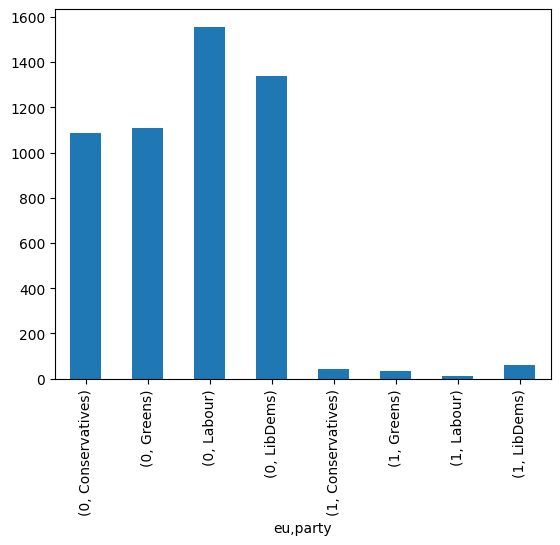

In [4]:
df.groupby(["eu","party"])["text"].count().plot.bar()

In [5]:
# Step 3: Train-Test Split
train_df, test_df = train_test_split(df, test_size=0.2)

In [6]:
# Step 4: Tokenization
tokenizer = BertTokenizer.from_pretrained('google/bert_uncased_L-4_H-256_A-4')

class ManifestoDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=256)
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = ManifestoDataset(train_df['text'].tolist(), train_df['eu'].tolist())
test_dataset = ManifestoDataset(test_df['text'].tolist(), test_df['eu'].tolist())

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/383 [00:00<?, ?B/s]

In [7]:
# Step 5: Model Initialization
model = BertForSequenceClassification.from_pretrained('google/bert_uncased_L-4_H-256_A-4')

pytorch_model.bin:   0%|          | 0.00/45.1M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-4_H-256_A-4 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
# Step 6: Model Fine-Tuning
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=64,
    warmup_steps=100,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

trainer.train()


Step,Training Loss
10,0.865800
20,0.752400
30,0.579000
40,0.426700
50,0.334400
60,0.215300
70,0.130600
80,0.134100
90,0.235700
100,0.122600


TrainOutput(global_step=524, training_loss=0.1766520071746284, metrics={'train_runtime': 251.8181, 'train_samples_per_second': 16.647, 'train_steps_per_second': 2.081, 'total_flos': 6328668872448.0, 'train_loss': 0.1766520071746284, 'epoch': 1.0})

In [9]:
# Step 7: Evaluation
trainer.evaluate()

{'eval_loss': 0.15963461995124817,
 'eval_runtime': 11.1734,
 'eval_samples_per_second': 93.794,
 'eval_steps_per_second': 1.521,
 'epoch': 1.0}

In [11]:
# Predictions on Test Set
model.eval()  # Set model to evaluation mode
predictions = []
true_labels = []

for batch in test_dataset:
    inputs = {k: v.unsqueeze(0).to('cuda' if torch.cuda.is_available() else 'cpu') for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    predictions.append(logits.argmax(-1).cpu().numpy()[0])
    true_labels.append(batch['labels'].item())

predictions = np.array(predictions)
true_labels = np.array(true_labels)

# Calculate Metrics
accuracy = accuracy_score(true_labels, predictions)
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predictions, average='binary')
roc_auc = roc_auc_score(true_labels, predictions)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC-AUC: {roc_auc}')


Accuracy: 0.9637404580152672
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
